In [408]:
from twython import TwythonStreamer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pprint import pprint
import re
import pymongo
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os

In [409]:
CONSUMER_KEY = r'Et3rX2Zjpa2VQVGUJSbMgj960'
CONSUMER_SECRET = r'jBzvvxc6MS3ErmP7HBb53VyqoktUKVblxgpUtv19r5O9hrOXqV'
ACCESS_TOKEN = r'357028618-gIFRDv1f5tsBX5KZCR4u7hgKuufIPjiTQ9m4K4kw'
ACCESS_TOKEN_SECRET = r'0Wlzyj0hpBqEKJZ5sUbr8AWQC0CvHedHM19IAYTx7kKXP'

In [410]:
analyser = SentimentIntensityAnalyzer()
negdict = {}
posdict = {}

In [411]:
from nltk.corpus import stopwords

In [412]:
stop = stopwords.words('english')

with open(r'C:\Data\twitterwords.txt','r') as twitterwords:
    twwords = [line.strip() for line in twitterwords]

with open(r"C:\Data\dictionarywords.txt",'r') as dictwords:
    dictwords = [line.strip() for line in dictwords]


In [413]:
class MyStreamer(TwythonStreamer):  # inherits from base class TwythonStreamer.

    counter = 0

    def on_success(self, data):
            try:
                if data['lang'] == 'en':
                    MyStreamer.counter += 1
                    print('Yes - Tweet number {a} has arrived'.format(a=MyStreamer.counter))
                    print(data['text'])
                    tweet_words = [words.strip().replace(':','') for words in data['text'].split()]
                    twe = [w for w in tweet_words if w in dictwords]
                    tweets = [wor.lower().strip() for wor in twe if wor.lower().strip() not in (stop and twwords)]
                    for word in tweets:
                        if float(analyser.polarity_scores(data['text'])['compound'])<0:
                             negdict[word] = negdict.get(word,0) + 1
                        elif float(analyser.polarity_scores(data['text'])['compound'])>0:
                            posdict[word] = posdict.get(word,0) + 1
            except:
                pass

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()


stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

In [414]:
while True:
    stream.statuses.filter(track='Mugabe') 

Yes - Tweet number 1 has arrived
RT @vicenews: Change is coming in Zimbabwe as President Robert Mugabe’s 37-year regime falls https://t.co/Q9AlKDq3JC
Yes - Tweet number 2 has arrived
RT @OpenParlyZw: Maridadi: Robert Mugabe only cared about himself and family #impeachmugabe
Yes - Tweet number 3 has arrived
RT @ODDSbible: A 'Wenger Out' placard at an anti-Mugabe protest march in Zimbabwe

Arsenal fans never disappoint 😂 https://t.co/2b2ZmW3Mpv
Yes - Tweet number 4 has arrived
This continent will miss Ian Khama. https://t.co/mKghtpBxGJ
Yes - Tweet number 5 has arrived
RT @BBCBreaking: Zimbabwe parliament begins impeachment hearing against President Mugabe, who refuses to quit despite army takeover https:/…
Yes - Tweet number 6 has arrived
RT @channelstv: Zimbabwe Parliament Opens Session To Begin Mugabe Impeachment https://t.co/b1hyiAGJc7
Yes - Tweet number 7 has arrived
Zimbabwe MPs begin Mugabe impeachment hearing - Zimbabwe's parliament opens the hearing against the president, ... htt

Yes - Tweet number 58 has arrived
RT @OpenParlyZw: Hon. Maridadi: When Mugabe took over the Zim dollar was at par with the Pound #ImpeachMugabe
Yes - Tweet number 59 has arrived
RT @povozim: Kenneth Kaunda in #Zimbabwe to convince #Mugabe to step down

=&gt;Sent by Zambian President Edgar Lungu

=&gt;Kaunda lik… 
Yes - Tweet number 60 has arrived
RT @SihleSays: “The land is ours, we give it to who we please, it is not the business of Britain to tell us who to give land and w… 
Yes - Tweet number 61 has arrived
MP speaking in favour of Mugabe's record is insulted "Futseke" by one other MP. 
 #MugabeImpeachment #Zimbabwe 
Wat… https://t.co/MlkdE6sFHB
Yes - Tweet number 62 has arrived
RT @elnathan_john: Damn. I can see Forest Whittaker doing this scene with that his Hollywood-Africana accent. 
No. I refusu..to... eat… 
Yes - Tweet number 63 has arrived
RT @DougColtart: The news about Zimbabweans’ struggle to bring down Mugabe has reached the remote village of Tawarayama Onsen in Hon… 
Yes

KeyboardInterrupt: 

In [431]:
negwordslist = np.array(sorted(negdict.items(), key =lambda x: x[1], reverse=True))

In [430]:
poswordslist = np.array(sorted(posdict.items(), key =lambda x: x[1], reverse=True))

In [429]:
negawords = []
words_amount_neg = 10
for keys in range(0,words_amount_neg):
    for num in range(0,int(negwordslist[keys:keys+1,1][0])):
        negawords.append(str(negwordslist[keys:keys+1,0][0]))

In [424]:
poswords = []
words_amount_pos = 20
for keys in range(0,words_amount_pos):
    for num in range(0,int(poswordslist[keys:keys+1,1][0])):
        poswords.append(str(poswordslist[keys:keys+1,0][0]))

In [425]:
%matplotlib inline

In [426]:
with Image.open(r"C:\Users\Admin\Pictures\taxi.png",'r') as image:
    mask = np.array(image)

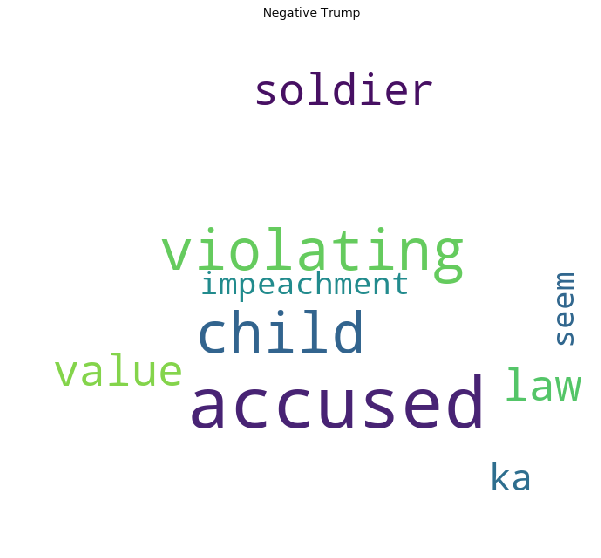

In [427]:
plt.figure(figsize=(10,10))
negwordcloud = WordCloud(mask=mask,background_color='white', relative_scaling=0.5).generate(" ".join(negawords))
plt.title("Negative Trump")
plt.axis("off")
plt.imshow(negwordcloud)

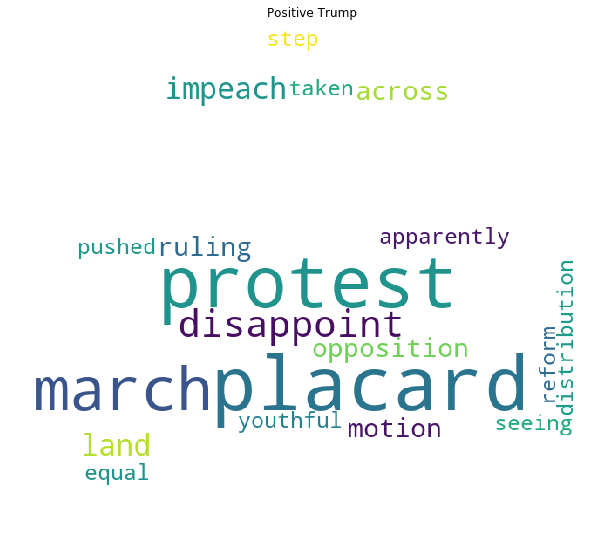

In [428]:
plt.figure(figsize=(10,10))
poswordcloud = WordCloud(background_color='white', mask=mask, relative_scaling=0.5).generate(" ".join(poswords))
plt.title("Positive Trump")
plt.axis("off")
plt.imshow(poswordcloud)